In [189]:
import numpy as np
import pandas as pd
import re

In [190]:
df = pd.read_csv('bikes.csv')

In [191]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [192]:
df.describe()

,model_year,price
count,7857.000000,7.857000e+03
mean,2015.367698,1.067913e+05
std,4.001443,1.389261e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


In [193]:
df.isnull()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7852,False,False,False,False,False,False,False,False
7853,False,False,False,False,False,False,False,False
7854,False,False,False,False,False,False,False,False
7855,False,False,False,False,False,False,False,False


In [194]:
df.isna().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

In [195]:
df.duplicated().sum()

0

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [197]:
df.shape

(7857, 8)

In [198]:
cc = []

for veh in df.model_name:
    models = veh.split(" ")
    models = " ".join(models[:len(models)-1]).lower()

    # Case 1: if "xxxcc" is in models
    if re.search('[0-9]*cc', models, flags=re.I) is not None:
        if models[re.search('[0-9]*cc', models, flags=re.I).start():
                  re.search('[0-9]*cc', models, flags=re.I).end()] not in ['cc']:
            cc.append(models[re.search('[0-9]*cc', models, flags=re.I).start():
                              re.search('[0-9]*cc', models, flags=re.I).end()])
        else:
            cc.append(models)
    
    # Case 2: if "xxx cc" (with space) is in models
    elif re.search('[0-9]* (cc)', models, flags=re.I) is not None:
        cc.append(models[re.search('[0-9]* (cc)', models, flags=re.I).start():
                          re.search('[0-9]* (cc)', models, flags=re.I).end()])

    # Case 3: special handling for Hyosung
    elif "hyosung" in models:
        cc.append(models)

    # Case 4: otherwise, append full model name
    else:
        cc.append(models)


In [199]:
for i in range(len(cc)):
    if "1000" in cc[i]:
     cc[i] = "1000cc"

    elif "310" in cc[i]:
     cc[i] = "310cc"
    elif "apache rtr 200" in cc[i]:
     cc[i] = "200cc"
    elif "ns200" in cc[i]:
     cc[i] = "200cc"
    elif "rs200" in cc[i]:
     cc[i] = "200cc"
    elif "220" in cc[i]:
     cc[i] = "220cc"
    elif "400" in cc[i]:
     cc[i] = "400cc"
    elif "250" in cc[i]:
     cc[i] = "250cc"
    elif "125" in cc[i]:
     cc[i] = "125cc"
    elif "160" in cc[i]:
     cc[i] = "160cc"
    elif "150" in cc[i]:
     cc[i] = "150cc"
    elif "350" in cc[i]:
     cc[i] = "350cc"
    elif "200" in cc[i]:
     cc[i] = "200cc"
    elif "100" in cc[i]:
     cc[i] = "100cc"
    elif "180" in cc[i]:
     cc[i] = "180cc"
    elif "110" in cc[i]:
     cc[i] = "110cc"
    elif "390" in cc[i]:
     cc[i] = "390cc"
    elif "135" in cc[i]:
     cc[i] = "135cc"
    elif "r15" in cc[i]:
     cc[i] = "150cc"
    elif "650" in cc[i]:
     cc[i] = "650cc"
    elif "750" in cc[i]:
     cc[i] = "750cc"
    elif "800" in cc[i]:
     cc[i] = "800cc"
    elif "300" in cc[i]:
     cc[i] = "300cc"
    elif "765" in cc[i]:
     cc[i] = "765cc"
    elif "883" in cc[i]:
     cc[i] = "883cc"
    elif "797" in cc[i]:
     cc[i] = "797cc"

    elif "810" in cc[i]:
     cc[i] = "810cc"
    elif "321" in cc[i]:
     cc[i] = "321cc"
    elif "821" in cc[i]:
     cc[i] = "821cc"
    elif "120" in cc[i]:
     cc[i] = "120cc"
    elif "1745" in cc[i]:
     cc[i] = "1745cc"
    elif "899" in cc[i]:
     cc[i] = "899cc"
    elif "900" in cc[i]:
     cc[i] = "900cc"
    elif "302" in cc[i]:
     cc[i] = "302cc"
    elif "959" in cc[i]:
     cc[i] = "959cc"
    elif "600" in cc[i]:
     cc[i] = "600cc"
    elif "502" in cc[i]:
     cc[i] = "502cc"
    elif "um renegade" in cc[i]:
     cc[i] = "279cc"
    elif "hero splendor" in cc[i]:
     cc[i] = "97cc"
    elif "yamaha fz" in cc[i]:
     cc[i] = "150cc"
    elif "honda hornet" in cc[i]:
     cc[i] = "184cc"
    elif "royal enfield interceptor" in cc[i]:
     cc[i] = "650cc"
    elif "hero passion pro" in cc[i]:
     cc[i] = "113cc"
    elif "hero passion xpro" in cc[i]:
     cc[i] = "109cc"
    elif "harley-davidson street bob" in cc[i]:
     cc[i] = "1868cc"
    elif "harley-davidson fat bob" in cc[i]:
     cc[i] = "1868cc"
    elif "harley-davidson fat boy" in cc[i]:
     cc[i] = "1868cc"
    elif "harley-davidson street rod" in cc[i]:
     cc[i] = "749cc"
    elif "zx-10r" in cc[i]:
     cc[i] = "1000cc"
    elif "rsv4" in cc[i]:
     cc[i] = "1099cc"

    elif "tvs sport" in cc[i]:
     cc[i] = "109cc"
    elif "tvs star city" in cc[i]:
     cc[i] = "109cc"
    elif "harley-davidson superlow" in cc[i]:
     cc[i] = "883cc"
    elif "harley-davidson roadster" in cc[i]:
     cc[i] = "1202cc"
    elif "harley-davidson forty eight" in cc[i]:
     cc[i] = "1202cc"
    elif "harley-davidson night rod special" in cc[i]:
     cc[i] = '1247cc'
    elif "triumph rocket iii roadster" in cc[i]:
     cc[i] = "2458cc"
    elif "triumph thunderbird lt" in cc[i]:
     cc[i] = "1699cc"
    elif "kawasaki vulcan s black" in cc[i]:
     cc[i] = "649cc"
    elif "mahindra mojo black pearl" in cc[i]:
     cc[i] = "300cc"
    elif "ducati diavel carbon" in cc[i]:
     cc[i] = "1198cc"
    elif "triumph tiger explorer" in cc[i]:
     cc[i] = "1215cc"
    elif "royal enfield continental" in cc[i]:
     cc[i] = "650cc"
    elif "triumph street triple s" in cc[i]:
     cc[i] = "765cc"
    elif "harley-davidson breakout" in cc[i]:
     cc[i] = "1868cc"
    elif "harley-davidson cvo" in cc[i]:
     cc[i] = "1923cc"

In [200]:
cc_cleaned = []
for i in cc:
    match = re.search(r'(\d+)', str(i))  # extract number
    if match:
        cc_cleaned.append(int(float(match.group(1))))  # handle decimals too
    else:
        cc_cleaned.append(None)


In [201]:
df['cc'] = cc_cleaned

In [202]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,400
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,330


In [203]:
df.cc.isna().sum()

0

In [204]:
np.unique([i.split()[0] for i in df.model_name])

array(['Aprilia', 'BMW', 'Bajaj', 'Benelli', 'BenelliImperiale', 'Ducati',
       'Fb', 'Harley-Davidson', 'Hero', 'Honda', 'Husqvarna', 'Hyosung',
       'Ideal', 'Indian', 'Jawa', 'KTM', 'Kawasaki', 'MV', 'Mahindra',
       'Moto', 'Royal', 'Suzuki', 'TVS', 'Triumph', 'UM', 'Yamaha',
       'Yazdi', 'yamaha'], dtype='<U16')

In [205]:
df[df.model_name.str.contains("BenelliImperiale") > 0]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
2809,BenelliImperiale 400 BS6 2020,2020,2800 Km,first owner,mumbai,\n\n 35 kmpl,20.7 bhp,207500,400
2978,BenelliImperiale 400 2020,2020,1500 Km,first owner,mumbai,\n\n,20.7 bhp,207500,400
2979,BenelliImperiale 400 2020,2020,3500 Km,first owner,mumbai,\n\n,20.7 bhp,206462,400
4177,BenelliImperiale 400 2020,2020,3500 Km,first owner,mumbai,\n\n,20.7 bhp,220000,400
4399,BenelliImperiale 400 2020,2020,7700 Km,first owner,bangalore,\n\n,20.7 bhp,220000,400
5177,BenelliImperiale 400 2020,2020,1900 Km,first owner,secunderabad,\n\n,20.7 bhp,240000,400


In [206]:
df.model_name.replace('BenelliImperiale 400 2020','BenelliImperiale 400 2020',inplace=True)
df.model_name.replace('BenelliImperiale 400 BS6 2020','Benelli Imperiale 400 BS6 2020',inplace=True)

In [207]:
Brands = [i.split()[0] for i in df.model_name]
df['Brand'] = Brands

In [208]:
df.Brand.unique()

array(['Bajaj', 'Royal', 'Hyosung', 'Jawa', 'KTM', 'TVS', 'Yamaha',
       'Honda', 'UM', 'Hero', 'Suzuki', 'Husqvarna', 'Mahindra',
       'Harley-Davidson', 'Kawasaki', 'Benelli', 'Triumph', 'Ducati',
       'BMW', 'Ideal', 'BenelliImperiale', 'Moto', 'Fb', 'Indian',
       'Yazdi', 'Aprilia', 'MV', 'yamaha'], dtype=object)

In [209]:
df.replace('yamaha','Yamaha',inplace=True)

In [210]:
df.Brand.unique()

array(['Bajaj', 'Royal', 'Hyosung', 'Jawa', 'KTM', 'TVS', 'Yamaha',
       'Honda', 'UM', 'Hero', 'Suzuki', 'Husqvarna', 'Mahindra',
       'Harley-Davidson', 'Kawasaki', 'Benelli', 'Triumph', 'Ducati',
       'BMW', 'Ideal', 'BenelliImperiale', 'Moto', 'Fb', 'Indian',
       'Yazdi', 'Aprilia', 'MV'], dtype=object)

In [211]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,Brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,330,Jawa


In [212]:
def clean_kms(val):
    val = str(val).lower().strip()
    
    # case 1: values like "Mileage 65 Kmpl"
    if "kmpl" in val:
        return np.nan   # mark as missing  
    
    # case 2: values like "7759 Km"
    if "km" in val:
        val = val.replace("km", "").replace(",", "").strip()
        return float(val) if val.isdigit() else np.nan
    
    return np.nan

df["kms_driven"] = df["kms_driven"].apply(clean_kms)


In [213]:
df.isna().sum()

model_name       0
model_year       0
kms_driven    1988
owner            0
location        19
mileage         11
power           31
price            0
cc               0
Brand            0
dtype: int64

In [214]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,Brand
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,NaN,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000.0,first owner,bangalore,\n\n,30 bhp,197500,330,Jawa


In [215]:
df.kms_driven.max()

1000000.0

In [216]:
df.kms_driven.min()

0.0

In [217]:
df.kms_driven.mean()

23090.124723121487

In [218]:
df.kms_driven.median()

17000.0

In [219]:
 # Calculate Q1, Q3, and IQR
Q1 = df['kms_driven'].quantile(0.25)
Q3 = df['kms_driven'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Detect outliers
outliers = df[(df['kms_driven'] < lower_bound) | (df['kms_driven'] > upper_bound)]
print("Number of outliers:", len(outliers))

# Optionally remove outliers
##df_no_outliers = df[(df['kms_driven'] >= lower_bound) & (df['kms_driven'] <= upper_bound)]


Q1: 8903.0
Q3: 30000.0
IQR: 21097.0
Lower Bound: -22742.5
Upper Bound: 61645.5
Number of outliers: 290


In [220]:
# Show top 20 bikes with highest kms_driven
print(df[['model_year','kms_driven','mileage','power','price']].sort_values(by='kms_driven', ascending=False).head(20))


      model_year  kms_driven       mileage             power   price
1020        2003   1000000.0  \n\n 83 kmpl          7.70 bhp   23500
5572        2011    620010.0  \n\n 45 kmpl            17 bhp   28000
4489        2000    550000.0  \n\n 37 kmpl         19.80 bhp  105000
1371        2014    550000.0  \n\n 38 kmpl         18.28 bhp   50000
1597        2016    416242.0  \n\n 25 kmpl          26.37 PS  120000
2768        1994    366600.0  \n\n 45 kmpl           7.44bhp   36508
1498        2016    310000.0  \n\n 38 kmpl            21 bhp   55000
4621        2016    310000.0  \n\n 38 kmpl            21 bhp   50000
2901        2015    303000.0  \n\n 35 kmpl         19.80 Bhp  110000
6471        2019    270839.0  \n\n 35 kmpl         19.80 bhp  190000
7798        2010    253621.0   \n\n 5 kmpl           8.2 Bhp   18000
1373        2010    240000.0  \n\n 75 kmpl             9 bhp   26000
3122        2018    230000.0         \n\n            15.5 PS   48750
4961        2003    200000.0  \n\n

In [221]:
df['kms_driven'] = df['kms_driven'].fillna(df['kms_driven'].mean())


In [222]:
df.kms_driven.isna().sum()

0

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


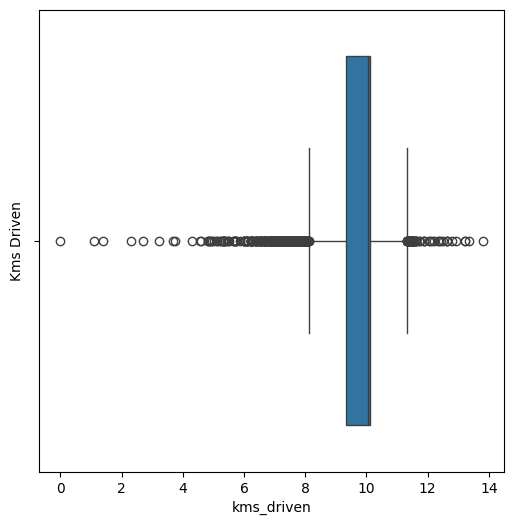

In [224]:
plt.figure(figsize=(6,6))
sns.boxplot(x=np.log(df['kms_driven']))    
plt.ylabel("Kms Driven")
plt.show()

In [225]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,Brand
0,Bajaj Avenger Cruise 220 2017,2017,17000.000000,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000.000000,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795.000000,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,23090.124723,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000.000000,first owner,bangalore,\n\n,30 bhp,197500,330,Jawa


In [226]:
df.location.value_counts().sort_values(ascending=False)

location
delhi          1438
mumbai          857
bangalore       783
pune            343
hyderabad       337
               ... 
mubarakpur        1
ambur             1
bhatkal           1
khopoli           1
sidlaghatta       1
Name: count, Length: 561, dtype: int64

In [227]:
top_n = 30  # keep top 30 cities
top_locations = df['location'].value_counts().nlargest(top_n).index

df['location'] = df['location'].apply(lambda x: x if x in top_locations else "Other")


In [228]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,Brand
0,Bajaj Avenger Cruise 220 2017,2017,17000.000000,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000.000000,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795.000000,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,23090.124723,first owner,Other,\n\n 28 Kms,34.50 bhp,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000.000000,first owner,bangalore,\n\n,30 bhp,197500,330,Jawa


In [229]:
df.mileage.value_counts()

mileage
\n\n 35 kmpl      1071
\n\n               727
\n\n 40 kmpl       618
\n\n 65 Kmpl       436
\n\n 25 kmpl       329
                  ... 
\n\n 54 kmpl         1
\n\n 25kmpl          1
\n\n 77 Kmpl         1
\n\n 96.9 Kmpl       1
\n\n 70 kmpl         1
Name: count, Length: 117, dtype: int64

In [230]:
df.mileage.isna().sum()

11

In [231]:
mil = df.mileage.to_list()
mil = [str(i).lower().replace('kmpl','').split("-")[0] for i in mil ]
mil = [str(i).lower().replace('kms','') for i in mil ]
mil = [str(i).replace('\n','') for i in mil ]
mil = [str(i).strip() for i in mil]
df.mileage = mil

In [232]:
df[df['mileage'] == '']

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,Brand
4,Jawa Perak 330cc 2020,2020,2000.0,first owner,bangalore,,30 bhp,197500,330,Jawa
40,Bajaj Discover 110cc 2019,2019,45000.0,first owner,chittorgarh,,8.60 bhp,46000,110,Bajaj
50,Royal Enfield Bullet 350cc 2019,2019,27300.0,first owner,hyderabad,,19.80 bhp,130000,350,Royal
62,Royal Enfield Thunderbird X 350cc ABS 2019,2019,9000.0,first owner,mumbai,,19.80 bhp,166000,350,Royal
63,TVS Apache RTR 160 4V DISC ABS 2019,2019,21500.0,first owner,hyderabad,,16.1 bhp,93000,160,TVS
...,...,...,...,...,...,...,...,...,...,...
7815,Honda Livo 110cc 2019,2019,15492.0,first owner,jaipur,,8.25 Bhp,53214,110,Honda
7816,Bajaj Discover 135cc 2010,2010,21728.0,first owner,chennai,,9.64 kw,16000,135,Bajaj
7832,Bajaj Discover 135cc 2009,2009,18000.0,first owner,delhi,,9.64 kw,21000,135,Bajaj
7837,Bajaj Discover 135cc 2009,2009,25000.0,first owner,delhi,,9.64 kw,22000,135,Bajaj


In [233]:
df['mileage'] = df['mileage'].replace('',np.nan)

In [234]:
df.mileage.isna().sum()

727

In [235]:
# Convert mileage column to numeric
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
 

In [236]:

# Now fill NaN with median
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

In [237]:
df.mileage.mode()

0    40.0
Name: mileage, dtype: float64

In [238]:
df['mileage'] = df['mileage'].replace('liquid cooled',37.6)

In [239]:
df.mileage.astype(float)

0       35.0
1       35.0
2       30.0
3       28.0
4       40.0
        ... 
7852    42.0
7853    80.0
7854    65.0
7855    57.0
7856    38.0
Name: mileage, Length: 7857, dtype: float64

<Axes: xlabel='mileage'>

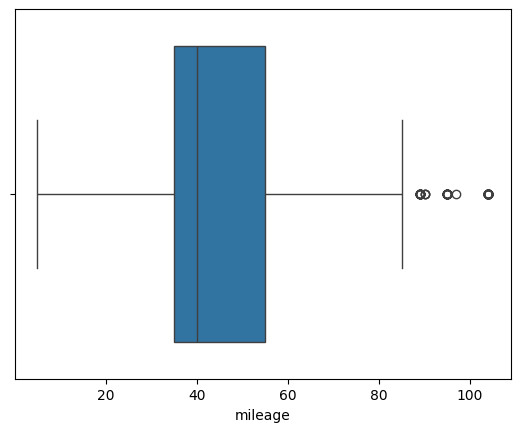

In [240]:
sns.boxplot(x=df.mileage)

In [241]:
# Show top 20 bikes with highest kms_driven
print(df[['model_year','mileage','price','model_name']].sort_values(by='mileage', ascending=False).head(20))


      model_year  mileage  price                          model_name
7721        2012    104.0  19000            Bajaj Platina 100cc 2012
392         2019    104.0  48000            Bajaj Platina 100cc 2019
305         2019    104.0  55000   Bajaj Platina Alloy ES-110cc 2019
1249        2018    104.0  45000  Bajaj Platina  Alloy ES-100cc 2018
99          2019    104.0  57000  Bajaj Platina  Alloy ES-100cc 2019
928         2014    104.0  28000            Bajaj Platina 100cc 2014
4466        2019    104.0  48400   Bajaj Platina Alloy ES-110cc 2019
4589        2015    104.0  25000            Bajaj Platina 100cc 2015
4588        2017    104.0  30000  Bajaj Platina  Alloy ES-100cc 2017
7635        2011    104.0  16000            Bajaj Platina 100cc 2011
4365        2011    104.0  24000            Bajaj Platina 100cc 2011
7602        2014    104.0  20000            Bajaj Platina 100cc 2014
7842        2010    104.0  14800            Bajaj Platina 100cc 2010
5349        2009    104.0  20000  

In [242]:
# Example: set mileage = '80' where model_name contains 'Platina 100cc'
df.loc[df['model_name'].str.contains('Platina ', na=False), 'mileage'] = '80'


/var/folders/l6/86qm81zs261bb1d74___k8pc0000gn/T/ipykernel_74532/2573563076.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '80' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['model_name'].str.contains('Platina ', na=False), 'mileage'] = '80'


In [243]:
# Example: set mileage = '80' where model_name contains 'Platina 100cc'
df.loc[df['model_name'].str.contains('TVS Sport', na=False), 'mileage'] = '80'


In [244]:
# Example: set mileage = '80' where model_name contains 'Platina 100cc'
df.loc[df['model_name'].str.contains('TVS Star Sport', na=False), 'mileage'] = '80'


In [245]:
# Remove unwanted text and convert to numeric
df['mileage'] = (
    df['mileage']
    .astype(str)                 # ensure all strings
    .str.extract(r'(\d+\.?\d*)') # extract number part
    .astype(float)               # convert to float
)


In [246]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,Brand
0,Bajaj Avenger Cruise 220 2017,2017,17000.000000,first owner,hyderabad,35.0,19 bhp,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000.000000,first owner,hyderabad,35.0,19.80 bhp,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795.000000,first owner,hyderabad,30.0,28 bhp,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,23090.124723,first owner,Other,28.0,34.50 bhp,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000.000000,first owner,bangalore,40.0,30 bhp,197500,330,Jawa


In [247]:
df.mileage.isna().sum()

0

In [248]:
df.power.value_counts()

power
19.80 bhp           922
13 bhp              354
27.20 bhp           283
19 bhp              271
24.50 bhp           207
                   ... 
20.51 bhp             1
25.1 bhp              1
85.8 BHP              1
15.1 bhp              1
14.9 kW (20 BHP)      1
Name: count, Length: 272, dtype: int64

In [249]:
df.power.isna().sum()

31

In [250]:
val= df.power.isna()
np.where(val == True)

(array([ 135, 1627, 1691, 1716, 2442, 2487, 2638, 2659, 2714, 2819, 3088,
        3977, 4393, 4425, 4591, 4760, 5626, 5673, 5694, 5788, 5950, 6155,
        6321, 6781, 6853, 7306, 7442, 7513, 7783, 7796, 7801]),)

In [251]:
df.iloc[135,df.columns.get_loc("power")] = "28"
df.iloc[1627,df.columns.get_loc("power")] = "14"
df.iloc[1691,df.columns.get_loc("power")] = "18"
df.iloc[1716,df.columns.get_loc("power")] = "18"
df.iloc[2442,df.columns.get_loc("power")] = "87"
df.iloc[2487,df.columns.get_loc("power")] = "18"
df.iloc[2638,df.columns.get_loc("power")] = "16"

df.iloc[2659,df.columns.get_loc("power")] = "64"
df.iloc[2714,df.columns.get_loc("power")] = "18"
df.iloc[2819,df.columns.get_loc("power")] = "87"
df.iloc[3088,df.columns.get_loc("power")] = "18"
df.iloc[3977,df.columns.get_loc("power")] = "37.5"
df.iloc[4393,df.columns.get_loc("power")] = "18"
df.iloc[4425,df.columns.get_loc("power")] = "111"
df.iloc[4591,df.columns.get_loc("power")] = "75.1"
df.iloc[4760,df.columns.get_loc("power")] = "18"
df.iloc[5626,df.columns.get_loc("power")] = "65"
df.iloc[5673,df.columns.get_loc("power")] = "89.2"
df.iloc[5694,df.columns.get_loc("power")] = "64"
df.iloc[5788,df.columns.get_loc("power")] = "11"
df.iloc[5950,df.columns.get_loc("power")] = "26.21"
df.iloc[6155,df.columns.get_loc("power")] = "15.2"
df.iloc[6321,df.columns.get_loc("power")] = "26.21"
df.iloc[6781,df.columns.get_loc("power")] = "28.15"
df.iloc[6853,df.columns.get_loc("power")] = "15.2"
df.iloc[7306,df.columns.get_loc("power")] = "10.70"
df.iloc[7442,df.columns.get_loc("power")] = "7.4"
df.iloc[7513,df.columns.get_loc("power")] = "23.17"
df.iloc[7783,df.columns.get_loc("power")] = "24.13"
df.iloc[7796,df.columns.get_loc("power")] = "7.4"
df.iloc[7801,df.columns.get_loc("power")] = "8.24"
df.iloc[7303,df.columns.get_loc("power")] = '7.6'
df.iloc[7303,df.columns.get_loc("power")] = '7.6'
df.iloc[7439,df.columns.get_loc("power")] = '7.9'
df.iloc[7510,df.columns.get_loc("power")] = '24.13'
df.iloc[7780,df.columns.get_loc("power")] = '24.10'
df.iloc[7793,df.columns.get_loc("power")] = '7.9'
df.iloc[7798,df.columns.get_loc("power")] = '8.2'






In [252]:
for index, row in df.iterrows():
    value = str(row["power"]).lower().strip()
    
    # Skip NaN or empty
    if value in ["nan", "", "none"]:
        continue

    # Remove text after '@' (e.g., "15.2 bhp @ 8500 rpm")
    if "@" in value:
        value = value.split("@")[0].strip()

    # Extract the first number in the string
    match = re.search(r"[\d\.]+", value)
    if not match:
        df.at[index, "power"] = None
        continue
    num = float(match.group())

    # Convert units into BHP
    if "bhp" in value:
        df.at[index, "power"] = num

    elif "hp" in value and "bhp" not in value:  # "hp" but not "bhp"
        df.at[index, "power"] = num * 0.986   # hp → bhp

    elif "kw" in value:
        df.at[index, "power"] = num * 1.341   # kW → bhp

    elif "ps" in value:
        df.at[index, "power"] = num * 0.99    # PS → bhp

    else:
        df.at[index, "power"] = num


In [253]:
df.power.isna().sum()

0

In [254]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,Brand
0,Bajaj Avenger Cruise 220 2017,2017,17000.000000,first owner,hyderabad,35.0,19.0,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000.000000,first owner,hyderabad,35.0,19.8,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795.000000,first owner,hyderabad,30.0,28.0,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,23090.124723,first owner,Other,28.0,34.5,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000.000000,first owner,bangalore,40.0,30.0,197500,330,Jawa


In [255]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,Brand
0,Bajaj Avenger Cruise 220 2017,2017,17000.000000,first owner,hyderabad,35.0,19.0,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000.000000,first owner,hyderabad,35.0,19.8,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795.000000,first owner,hyderabad,30.0,28.0,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,23090.124723,first owner,Other,28.0,34.5,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000.000000,first owner,bangalore,40.0,30.0,197500,330,Jawa


In [256]:
from sklearn.preprocessing import StandardScaler

In [257]:
df.drop(columns='model_name',inplace=True)

In [258]:
df.head()

,model_year,kms_driven,owner,location,mileage,power,price,cc,Brand
0,2017,17000.000000,first owner,hyderabad,35.0,19.0,63500,220,Bajaj
1,2016,50000.000000,first owner,hyderabad,35.0,19.8,115000,350,Royal
2,2012,14795.000000,first owner,hyderabad,30.0,28.0,300000,250,Hyosung
3,2017,23090.124723,first owner,Other,28.0,34.5,100000,400,Bajaj
4,2020,2000.000000,first owner,bangalore,40.0,30.0,197500,330,Jawa


In [259]:
df[df['cc'] == 100].mean(numeric_only=True)


model_year     2012.511424
kms_driven    31369.774551
mileage          58.971880
price         31188.156415
cc              100.000000
dtype: float64

In [260]:
# First, replace 0 with NaN (so we can fill easily)
df['price'] = df['price'].replace(0, np.nan)

# Compute mean price per cc & year
mean_price = df.groupby(['cc', 'model_year'])['price'].transform('mean')


In [261]:
mean_price

0        68076.289157
1       111667.014085
2       106689.411765
3       119391.877551
4       204762.500000
            ...      
7852     30445.554217
7853     31872.406250
7854     53153.205128
7855     55478.421875
7856     60367.747475
Name: price, Length: 7857, dtype: float64

In [262]:
df['price'] = df['price'].fillna(mean_price)

In [263]:
df['bike__age'] = 2025 - df['model_year']

<Axes: xlabel='Brand'>

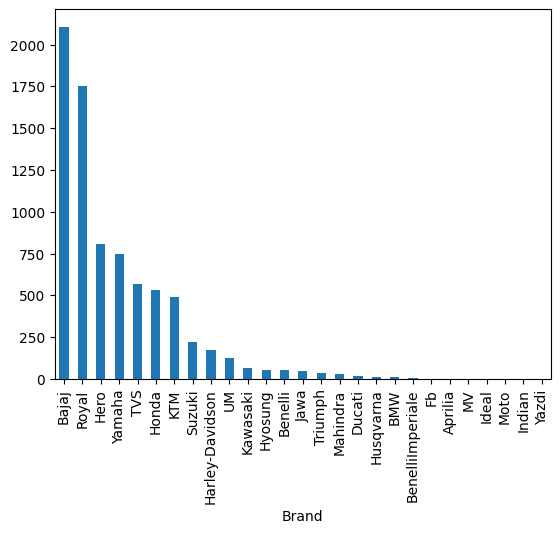

In [264]:
df.Brand.value_counts().plot(kind='bar')

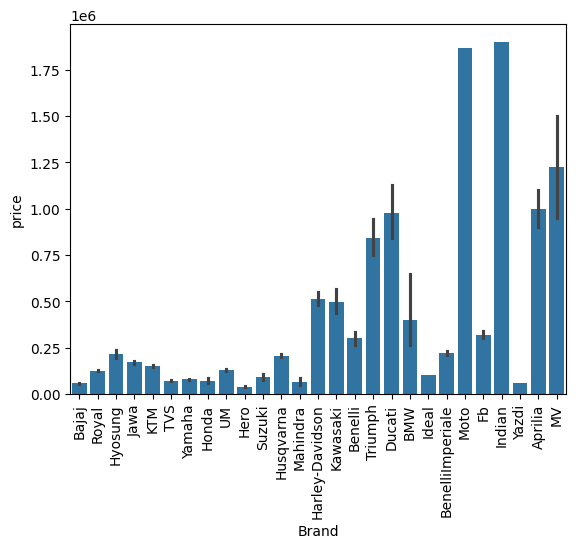

In [265]:
sns.barplot(x=df.Brand,y=df.price)
plt.xticks(rotation='vertical')
plt.show()

Text(0, 0.5, 'Count')

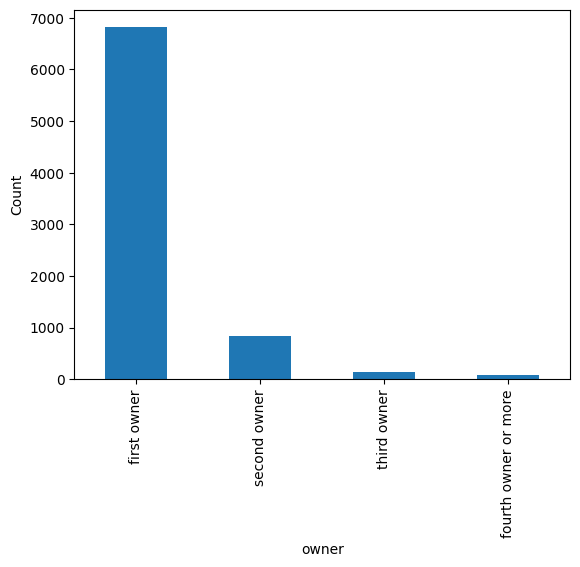

In [266]:
df.owner.value_counts().plot(kind='bar')
plt.ylabel('Count')

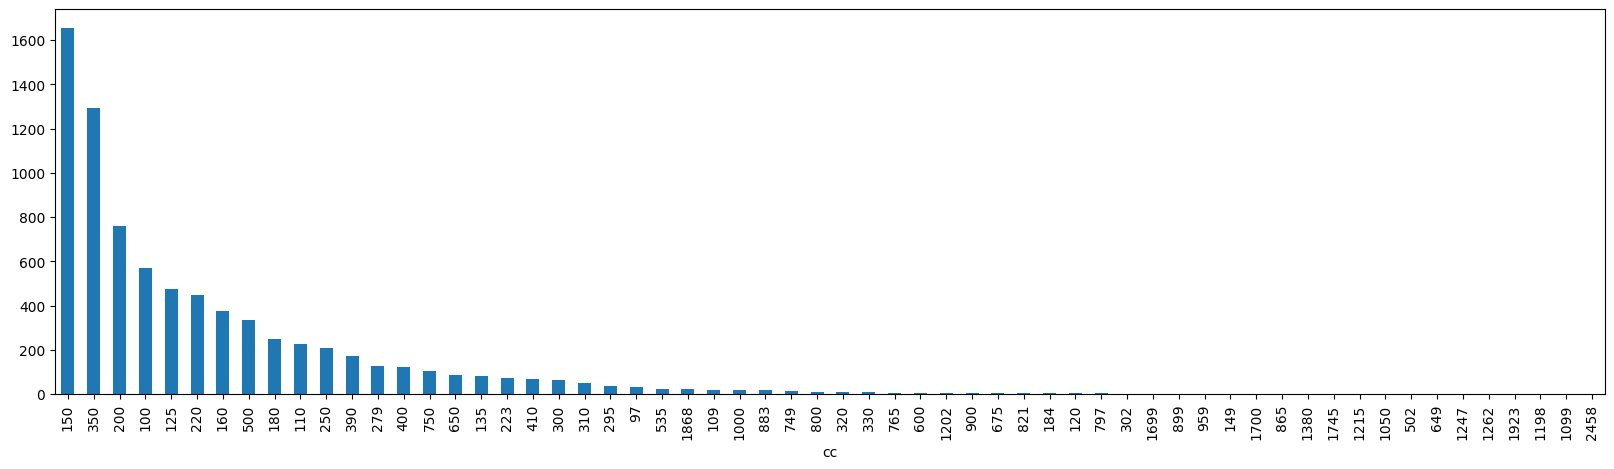

In [267]:
plt.figure(figsize=(20,5))
df.cc.value_counts().plot(kind='bar')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

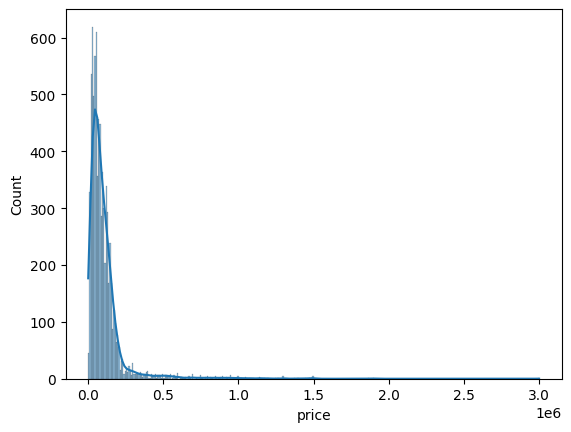

In [268]:
sns.histplot(df['price'],kde=True)

In [279]:
df.head()

,model_year,kms_driven,owner,location,mileage,power,price,cc,Brand,bike__age
0,2017,17000.000000,first owner,hyderabad,35.0,19.0,63500.0,220,Bajaj,8
1,2016,50000.000000,first owner,hyderabad,35.0,19.8,115000.0,350,Royal,9
2,2012,14795.000000,first owner,hyderabad,30.0,28.0,300000.0,250,Hyosung,13
3,2017,23090.124723,first owner,Other,28.0,34.5,100000.0,400,Bajaj,8
4,2020,2000.000000,first owner,bangalore,40.0,30.0,197500.0,330,Jawa,5


<Axes: xlabel='price', ylabel='Count'>

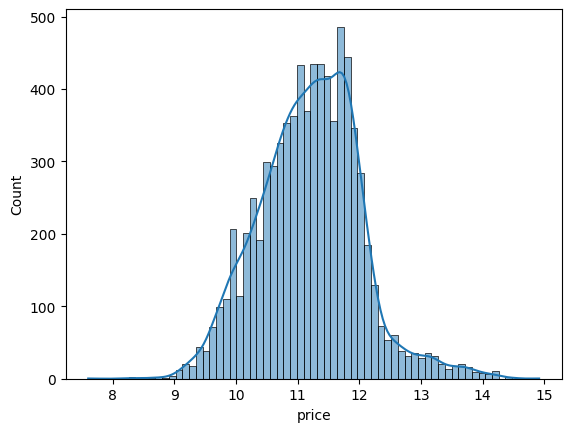

In [269]:
sns.histplot(np.log(df.price),kde=True)

In [270]:
X = df.drop(columns='price')
y = np.log(df.price)

In [271]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [272]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

## Linear Regressor

In [273]:
cat_col = ['location', 'owner','Brand']  
num_col = ['model_year', 'kms_driven', 'power', 'mileage','bike__age']  

# Step 1: Preprocessing
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), cat_col),
    ('num', StandardScaler(), num_col)
], remainder='passthrough')

# Step 2: Model
step2 = LinearRegression()

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.8350253759221886
MAE: 0.22710752716972504


## Ridge Regressor


In [274]:
cat_col = ['location', 'owner','Brand']  
num_col = ['model_year', 'kms_driven', 'power', 'mileage','bike__age']  

# Step 1: Preprocessing
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), cat_col),
    ('num', StandardScaler(), num_col)
], remainder='passthrough')

# Step 2: Model
step2 =  Ridge(alpha=10)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.8330653028273011
MAE: 0.22982615558735656


## Decision Tree Regressor


In [275]:
cat_col = ['location', 'owner','Brand']  
num_col = ['model_year', 'kms_driven', 'power', 'mileage','bike__age']  

# Step 1: Preprocessing
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), cat_col),
    ('num', StandardScaler(), num_col)
], remainder='passthrough')

# Step 2: Model
step2 =  DecisionTreeRegressor(max_depth=8)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.8850183910021603
MAE: 0.18076060471287894


In [276]:
cat_col = ['location', 'owner','Brand']  
num_col = ['model_year', 'kms_driven', 'power', 'mileage','bike__age']  

# Step 1: Preprocessing
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), cat_col),
    ('num', StandardScaler(), num_col)
], remainder='passthrough')

# Step 2: Model
step2 =  SVR()

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.6578766519739632
MAE: 0.3567590992226522


In [277]:
cat_col = ['location', 'owner','Brand']  
num_col = ['model_year', 'kms_driven', 'power', 'mileage','bike__age']  

# Step 1: Preprocessing
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'), cat_col),
    ('num', StandardScaler(), num_col)
], remainder='passthrough')

# Step 2: Model
step2 =   RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.9062104384053761
MAE: 0.1556824275610606


## Export The Model

In [278]:
import pickle

pickle.dump(df,open('df1.pkl','wb'))
pickle.dump(pipe,open('pipe1.pkl','wb'))